In [10]:
import openai
from openai import OpenAI
import os
from dotenv import load_dotenv
import ast
from pathlib import Path
import json
import numpy as np
import matplotlib.pyplot as plt

#Funtions file with unique functions
import functions

In [11]:
# Specify the path to the .env file
env_path = Path(r'C:\Users\CrazyFlie\Documents\Nonuploadable_Git\.env')

# Load the .env file
load_dotenv(dotenv_path=env_path)

# Get the OpenAI API key from environment variables
api_key = os.getenv("OPENAI_API_KEY")

client = OpenAI(
    api_key=api_key
)

In [19]:
requested_design = "Star"

In [32]:
current_coordinates = [[2,2]]

In [33]:
prompt = functions.create_prompt(current_coordinates=current_coordinates, requested_design=requested_design)
print(prompt)


A drone is being used to place building blocks on a grid.
Please read all of the following instructions first.

You will be asked to come up with the drop-off locations for the drone that create a specified design.
The origin of the grid is [0,0] in the bottom left corner and the last point is [4,4] in the top right.
The X axis goes from [0,0] to [4,0]. The Y axis goes from [0,0] to [0,4]. 

You can think of the grid like the pixels of a tv screen, with your job being to decide which pixel to turn on.
The grid currently looks as follows, where "o" is an empty spot (or off pixel) and "x" is a spot that has a existing block (or on pixel):

4 o o o o o
3 o o o o o
2 o o x o o
1 o o o o o
0 o o o o o
  0 1 2 3 4



Any space marked with "x" has already been chosen and must be incorporated in the design you will create.
If spaces are already marked with "x", consider how different orientations of your design can best utilize them. 
This might mean you need to rotate or shift your chosen po

In [34]:
# Define the prompt
prompt = prompt

# Send the request to OpenAI using the new ChatCompletion method
response = client.chat.completions.create(
    model="gpt-4o",
    response_format = {"type": "json_object"},
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],   
)

In [35]:
# Extract the response text
response_text = response.choices[0].message.content
#print(response_text)

[[1, 2], [3, 2], [2, 3], [2, 1]]


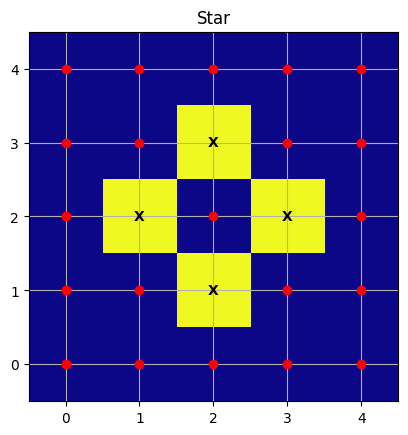

The existing block at [2, 2] can serve as the center of the star. New coordinates around this central position can form the star's arms. Hence, the blocks are added at [1, 2] to the left, [3, 2] to the right, [2, 3] above, and [2, 1] below the center block, forming a cross shape that resembles a star.


In [36]:
# Load JSON data
data = json.loads(response_text)

# Loop through each design and plot
for design in data['Design']:
    title = design['Title']
    coordinates = design['New Coordinates']
    print(coordinates)
    functions.plot_coordinates(title, coordinates)
    print(design['Reasoning'])

In [37]:
grid_representation = functions.create_grid_representation(coordinates=coordinates)
print(grid_representation)

4 o o o o o
3 o o x o o
2 o x o x o
1 o o x o o
0 o o o o o
  0 1 2 3 4

